<a href="https://colab.research.google.com/github/G016/YBI-Foundation_Projects/blob/main/Internship_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Hand Written Digit Prediction - Classification Analysis**

The digit dataset consist of 8x8 pixel images of digits. The images attribute of the dataset stores 8x8 arrays of grayscale value for each image. We will use these arrays to visualize the first 4 images. The target attribute of the dataset stores the digit each images represents.

-------------

## **Objective**

The objective of this project is to develop a robust machine learning model for the classification of hand-written digits. This model aims to accurately recognize and classify digits ranging from 0 to 9, enabling applications such as optical character recognition (OCR), automated form processing, and digit recognition in various domains. The primary goals are to achieve high classification accuracy, optimize model performance, and explore advanced techniques for digit recognition in real-world scenarios.

## **Import Library**

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

## **Import Data**

In [ ]:
from sklearn.datasets import load_digits

In [ ]:
df = load_digits()

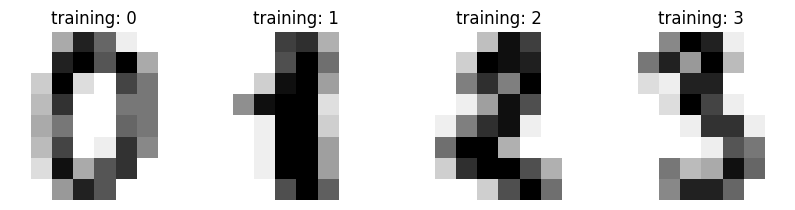

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10,3))
for ax, image, label in zip(axes, df.images, df.target):
  ax.set_axis_off()
  ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
  ax.set_title("training: %i" % label)

## **Data Preprocessing**

In [ ]:
df.images.shape

(1797, 8, 8)

In [ ]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [ ]:
df.images[0].shape

(8, 8)

In [ ]:
len(df.images)

1797

In [ ]:
n_samples = len(df.images)
data = df.images.reshape((n_samples, -1))

In [ ]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [ ]:
data[0].shape

(64,)

In [ ]:
data.shape

(1797, 64)

## **Scaling Image Data**

In [ ]:
data.min()

0.0

In [ ]:
data.max()

16.0

In [ ]:
data = data/16

In [ ]:
data.min()

0.0

In [ ]:
data.max()

1.0

In [ ]:
data[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

## **Train Test Split**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data, df.target, test_size=0.3)

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1257, 64), (540, 64), (1257,), (540,))

## **Modelling**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier()

In [ ]:
rf.fit(x_train, y_train)

RandomForestClassifier()

## **Prediction**

In [ ]:
y_pred = rf.predict(x_test)

In [ ]:
y_pred

array([3, 7, 5, 2, 8, 7, 0, 7, 4, 2, 9, 4, 0, 4, 2, 0, 0, 8, 2, 2, 8, 7,
       8, 6, 7, 5, 2, 8, 4, 1, 9, 8, 6, 3, 6, 9, 6, 9, 3, 0, 9, 9, 1, 9,
       3, 1, 8, 8, 5, 3, 9, 9, 3, 4, 2, 5, 3, 2, 0, 9, 1, 3, 7, 1, 4, 5,
       1, 0, 5, 8, 0, 4, 7, 6, 9, 0, 3, 2, 3, 1, 5, 6, 1, 3, 0, 6, 3, 7,
       6, 0, 5, 2, 6, 9, 5, 5, 6, 6, 4, 5, 7, 4, 2, 9, 5, 4, 2, 2, 5, 3,
       8, 4, 3, 7, 0, 8, 4, 0, 5, 4, 1, 6, 0, 4, 3, 1, 8, 5, 5, 5, 5, 9,
       2, 1, 7, 7, 8, 8, 0, 5, 3, 5, 7, 1, 1, 7, 6, 9, 8, 9, 0, 8, 5, 8,
       5, 9, 7, 0, 7, 2, 7, 4, 5, 6, 2, 2, 6, 9, 1, 1, 6, 6, 2, 6, 4, 4,
       1, 9, 7, 1, 3, 1, 6, 0, 9, 8, 0, 6, 8, 4, 7, 5, 1, 2, 8, 9, 4, 3,
       3, 3, 8, 1, 0, 8, 4, 5, 4, 9, 7, 3, 5, 7, 1, 6, 3, 6, 7, 3, 5, 9,
       6, 4, 9, 1, 5, 0, 0, 8, 2, 7, 3, 8, 1, 0, 7, 4, 0, 2, 5, 0, 7, 5,
       4, 0, 7, 1, 9, 7, 9, 4, 9, 5, 6, 8, 2, 1, 3, 6, 2, 1, 2, 1, 1, 5,
       9, 6, 6, 8, 9, 8, 5, 2, 6, 5, 7, 8, 7, 2, 2, 7, 1, 0, 8, 0, 2, 5,
       2, 2, 8, 6, 8, 7, 8, 4, 1, 5, 4, 4, 6, 5, 3,

## **Model Accuracy**

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
confusion_matrix(y_test, y_pred)

array([[52,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 55,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0, 59,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 45,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 48,  0,  0,  1,  0,  1],
       [ 0,  0,  0,  0,  1, 61,  0,  0,  0,  2],
       [ 0,  0,  0,  0,  0,  0, 57,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 47,  0,  0],
       [ 0,  1,  1,  0,  0,  1,  0,  0, 52,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  4,  0, 49]])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        53
           1       0.98      1.00      0.99        55
           2       0.98      0.98      0.98        60
           3       1.00      0.98      0.99        46
           4       0.96      0.96      0.96        50
           5       0.98      0.95      0.97        64
           6       1.00      1.00      1.00        57
           7       0.90      1.00      0.95        47
           8       0.98      0.95      0.96        55
           9       0.94      0.92      0.93        53

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540



## **Explaination**

Handwritten prediction in the context of classification analysis typically refers to the process of using machine learning or deep learning techniques to automatically recognize and categorize handwritten text or symbols into predefined classes or categories. This task is commonly encountered in applications such as optical character recognition (OCR), digit recognition, signature verification, and more.

Here's an explanation of the key steps and components involved in performing handwritten prediction through classification analysis:

1. **Data Collection**: The first step is to gather a dataset of handwritten samples that are representative of the problem you want to solve. For instance, if you're building a digit recognition system, you would collect a dataset containing handwritten digits (0-9). Each sample in the dataset should be labeled with the correct class/category (e.g., the digit represented by the handwriting).

2. **Data Preprocessing**:
   - **Data Cleaning**: Remove any noise or artifacts from the handwritten samples, such as background clutter or smudges.
   - **Normalization**: Normalize the data to make it consistent in terms of size, orientation, and scale. This ensures that the model can focus on the handwriting patterns rather than variations in writing style.

3. **Feature Extraction**: Extract relevant features from the handwritten samples that can help the model distinguish between different classes. Common techniques for feature extraction in handwriting analysis include pixel values, histograms of oriented gradients (HOG), or deep learning-based feature extraction using convolutional neural networks (CNNs).

4. **Model Selection**: Choose an appropriate machine learning or deep learning model for classification. For handwritten recognition tasks, deep learning models like CNNs and recurrent neural networks (RNNs) have shown significant success. The choice of the model depends on the complexity of the problem and the available data.

5. **Model Training**: Train the selected model on your labeled dataset. During training, the model learns to map the extracted features to the corresponding classes by adjusting its internal parameters. This typically involves minimizing a loss function that quantifies the difference between the predicted outputs and the true labels.

6. **Hyperparameter Tuning**: Fine-tune the hyperparameters of the model to optimize its performance. This includes adjusting learning rates, batch sizes, and architectural choices (e.g., the number of layers and units in a neural network).

7. **Validation and Testing**: Evaluate the model's performance using a separate validation dataset to ensure that it generalizes well to unseen data. This helps in detecting and mitigating issues like overfitting. Finally, test the model on a separate test dataset to assess its real-world performance.

8. **Post-processing**: Depending on the application, you may need to apply post-processing techniques to the model's predictions. For instance, in text recognition, you might use language models to improve the accuracy of word recognition.

9. **Deployment**: Once you're satisfied with the model's performance, deploy it in a production environment where it can make predictions on new handwritten samples.

10. **Monitoring and Maintenance**: Continuously monitor the model's performance in the real world and retrain it periodically with new data to ensure that it remains accurate over time.

In summary, handwritten prediction through classification analysis involves collecting, preprocessing, and labeling a dataset of handwritten samples, selecting an appropriate model, training and fine-tuning the model, and then deploying it to make predictions on new handwritten data. The success of this process depends on the quality of data, the choice of model, and the expertise in optimizing and maintaining the system.